# Tunisian Property price prediction

### Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Importing Data

In [4]:
df = pd.read_csv("/content/Property Prices in Tunisia.csv")

## EDA : Exploratory data analysis

In [5]:
#See the first rows of the data
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [6]:
#Data shape
df.shape

(12748, 9)

In [ ]:
#Statistical description
df.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


In [7]:
#Null Values
df.isnull().sum()

category          0
room_count        0
bathroom_count    0
size              0
type              0
price             0
city              0
region            0
log_price         0
dtype: int64

In [8]:
#See -1 values
(df==-1).sum()

category             0
room_count        3415
bathroom_count    3415
size              3415
type                 0
price                0
city                 0
region               0
log_price            0
dtype: int64

#### We can see that :
* The presence of -1 as a value => It is NULL value
* The number of -1 values is equal in 3 columns
* The presence of outliers in the data 
* The 'price' varies from 100 to 10e+11, and we can explain it using the fact that our data contains propoerties that are for 'Rent' (À Louer) and for 'Sale' (À Vendre) in the 'type' column

### Data Visualisation 

#### To get the best visualizations, we will replace all -1 values with Null (nan), and we willm drop duplicate rows

In [9]:
#Replace -1 with nan
df = df.replace(-1 , np.float('nan'))

In [10]:
df.duplicated(keep = False).sum()

2679

In [11]:
#Drop duplicate rows
df.drop_duplicates(keep = False, inplace = True) 

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(10069, 9)

#### **'type' column**

In [14]:
#Start with the 'type' column
print(df.type.value_counts())

À Vendre    5805
À Louer     4264
Name: type, dtype: int64


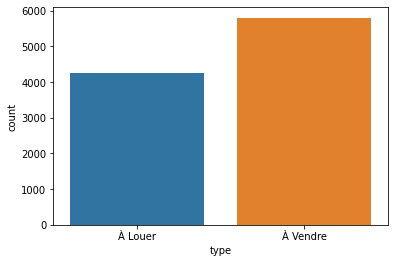

In [15]:
sns.countplot(data = df, x = 'type')

#### 'category' column

In [16]:
#category column
print(df.category.nunique())
print(df.category.unique())

7
['Appartements' 'Locations de vacances'
 'Magasins, Commerces et Locaux industriels' 'Maisons et Villas'
 'Terrains et Fermes' 'Colocations' 'Bureaux et Plateaux']


In [17]:
df.category.value_counts()

Appartements                                 3893
Maisons et Villas                            2724
Terrains et Fermes                           2130
Magasins, Commerces et Locaux industriels     596
Bureaux et Plateaux                           429
Locations de vacances                         232
Colocations                                    65
Name: category, dtype: int64

In [ ]:
df.category.value_counts().index

Index(['Appartements', 'Maisons et Villas', 'Terrains et Fermes',
       'Magasins, Commerces et Locaux industriels', 'Bureaux et Plateaux',
       'Locations de vacances', 'Colocations'],
      dtype='object')

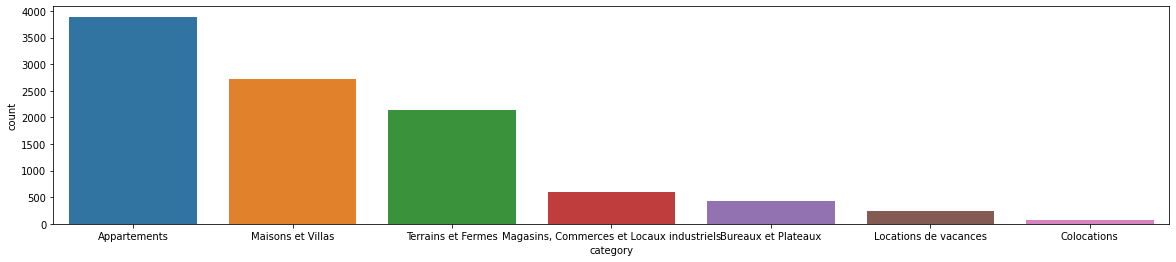

In [ ]:
#A quick barplot
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'category', order=df.category.value_counts().index)

#### 'city' column

In [ ]:
print(df.city.nunique())
print(df.city.unique())

24
['Ariana' 'Béja' 'Ben arous' 'Bizerte' 'Gabès' 'Gafsa' 'Jendouba'
 'Kairouan' 'Kasserine' 'Kébili' 'La manouba' 'Le kef' 'Mahdia' 'Médenine'
 'Monastir' 'Sidi bouzid' 'Siliana' 'Sousse' 'Tataouine' 'Tozeur'
 'Zaghouan' 'Sfax' 'Nabeul' 'Tunis']


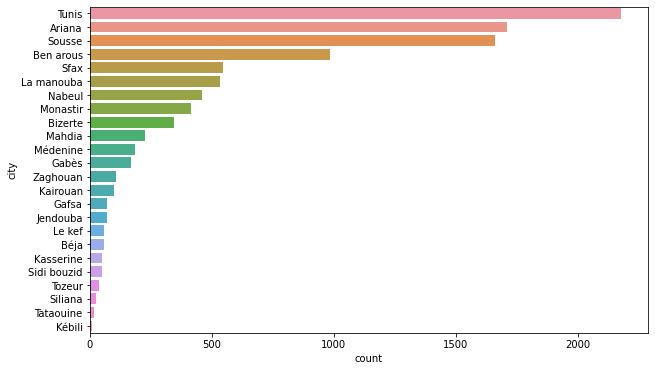

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, y = 'city', order = df.city.value_counts().index)

#### 'room_count' column

In [18]:
print(df.room_count.nunique())
print(df.room_count.unique())

18
[ 2.  1.  4.  5.  3. nan  6.  7. 11. 12. 10.  9.  8. 18. 14. 13. 20. 15.
 16.]


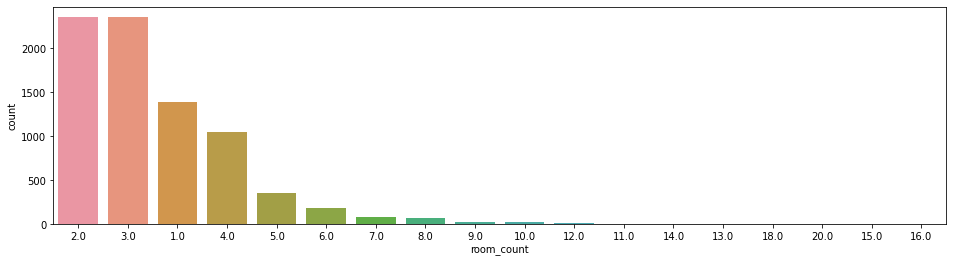

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(data = df, x = 'room_count', order = df.room_count.value_counts().index)

'bathroom_count' column

In [ ]:
print(df.bathroom_count.nunique())
print(df.bathroom_count.unique())

10
[ 1.  2.  3. nan  4.  0.  5.  8.  6. 10.  7.]


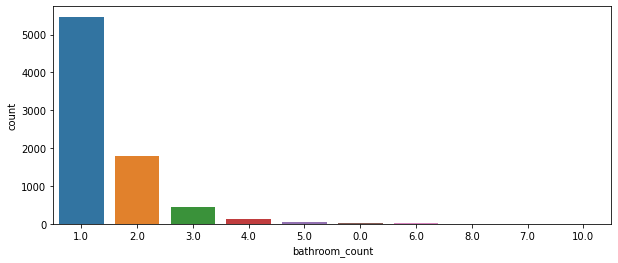

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df, x = 'bathroom_count', order = df.bathroom_count.value_counts().index)

'size' column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


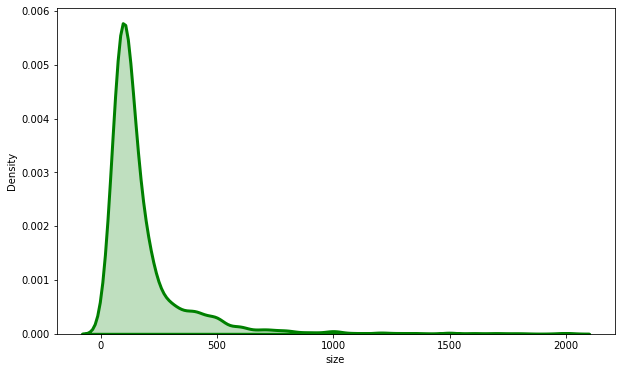

In [20]:
#Use a density plot
plt.figure(figsize=(10, 6))
sns.distplot(df['size'], hist=False, kde=True, 
              color = 'green',
             kde_kws={'linewidth': 3,'shade': True,})

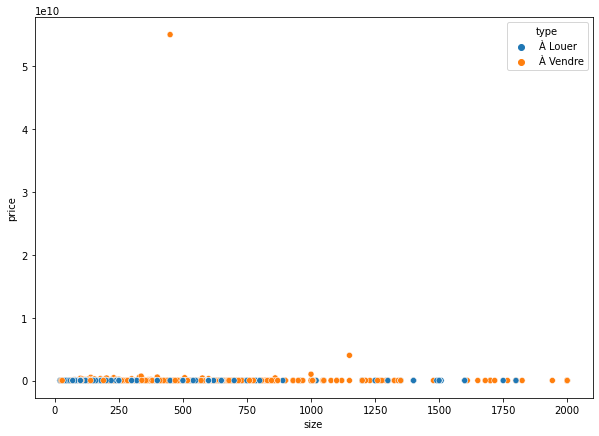

In [21]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="price", hue="type")

{'boxes': [<matplotlib.lines.Line2D at 0x7f917b2ce850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f917b2d48d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f917b259910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f917b2593d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f917b2cee10>,
  <matplotlib.lines.Line2D at 0x7f917b2d4390>]}

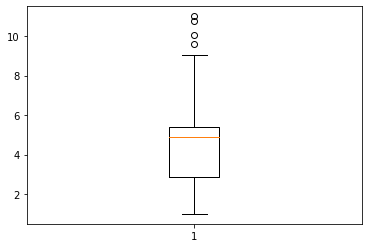

In [22]:

import numpy as np
import matplotlib.pyplot
plt.boxplot(df['log_price'])


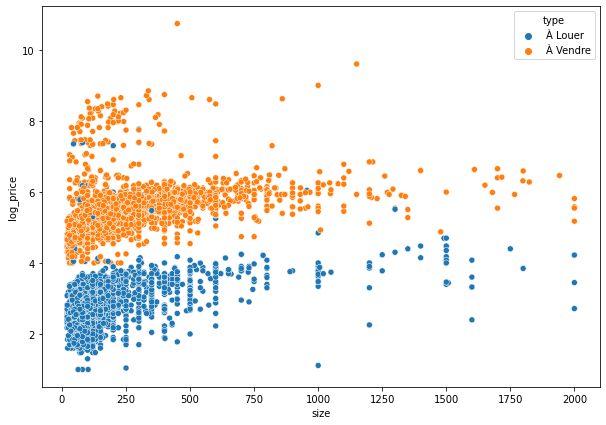

In [23]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="log_price", hue="type")

In [24]:
#Keep only the rows with at least 9 non-NA values.
df = df.dropna(thresh = 9)

In [26]:
df.isnull().sum()

category          0
room_count        0
bathroom_count    0
size              0
type              0
price             0
city              0
region            0
log_price         0
dtype: int64

In [27]:
dfVendre = df[df.type == 'À Vendre']
dfLouer = df[df.type == 'À Louer']

In [28]:
dfVendre.shape

(3675, 9)

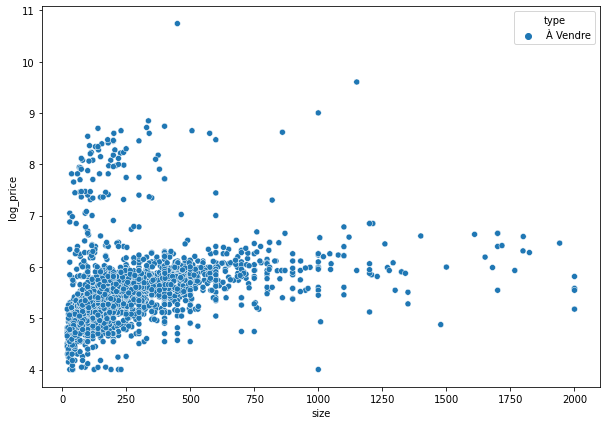

In [29]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfVendre , x="size", y="log_price", hue="type")

In [30]:
dfVendre

,category,room_count,bathroom_count,size,type,price,city,region,log_price
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
10,Maisons et Villas,4.0,2.0,1208.0,À Vendre,700000.0,Ariana,La Soukra,5.845098
14,Maisons et Villas,2.0,1.0,150.0,À Vendre,120000.0,Ariana,Raoued,5.079181
18,Appartements,2.0,1.0,80.0,À Vendre,230000.0,Ariana,Ennasr,5.361728
19,"Magasins, Commerces et Locaux industriels",1.0,1.0,20.0,À Vendre,55000.0,Ariana,Borj Louzir,4.740363
...,...,...,...,...,...,...,...,...,...
12740,Appartements,2.0,1.0,68.0,À Vendre,110000.0,Tunis,Centre Urbain Nord,5.041393
12741,Appartements,2.0,1.0,140.0,À Vendre,250000.0,Tunis,Tunis,5.397940
12742,Maisons et Villas,5.0,3.0,340.0,À Vendre,23205455.0,Tunis,Autres villes,7.365590
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035


In [32]:
z1 = np.abs(stats.zscore(dfVendre.log_price))
z2 = np.abs(stats.zscore(dfLouer.log_price))

In [33]:
len(z1)


3675

In [37]:
z1>3

0.0026725253479670725

In [38]:
(z1>3).sum()

84

In [40]:
threshold = 2
print(np.where(z1 > threshold))

(array([  27,  128,  163,  277,  469,  473,  487,  491,  557,  578,  588,
        595,  603,  612,  664,  669,  699,  705,  737,  745,  804,  825,
        947,  964,  986,  987, 1010, 1020, 1064, 1076, 1091, 1102, 1107,
       1116, 1121, 1152, 1162, 1166, 1179, 1184, 1185, 1188, 1221, 1274,
       1291, 1303, 1308, 1326, 1329, 1339, 1361, 1388, 1394, 1407, 1414,
       1422, 1431, 1446, 1466, 1493, 1509, 1516, 1518, 1566, 1595, 1609,
       1613, 1628, 1646, 1656, 1668, 1669, 1675, 1686, 1723, 1728, 1731,
       1759, 1775, 1782, 1789, 1791, 1839, 1859, 1884, 1957, 1968, 1976,
       2010, 2142, 2174, 2176, 2197, 2204, 2275, 2362, 2449, 2492, 2503,
       2521, 2561, 2574, 2594, 2638, 2675, 2684, 2816, 2858, 2947, 2976,
       2990, 3002, 3009, 3012, 3016, 3024, 3075, 3090, 3093, 3107, 3140,
       3148, 3171, 3184, 3219, 3230, 3244, 3318, 3320, 3340, 3349, 3364,
       3368, 3378, 3399, 3400, 3443, 3493, 3509, 3554, 3599, 3604, 3622,
       3672]),)


In [42]:
print(dfVendre.shape)
print(dfLouer.shape)

(3675, 9)
(4264, 9)


In [41]:
dfVendre_O  = dfVendre[(z1 < 2)]
dfLouer_O  = dfLouer[(z2 < 2)]
print(dfVendre_O.shape)
print(dfLouer_O.shape)


(3531, 9)
(4116, 9)


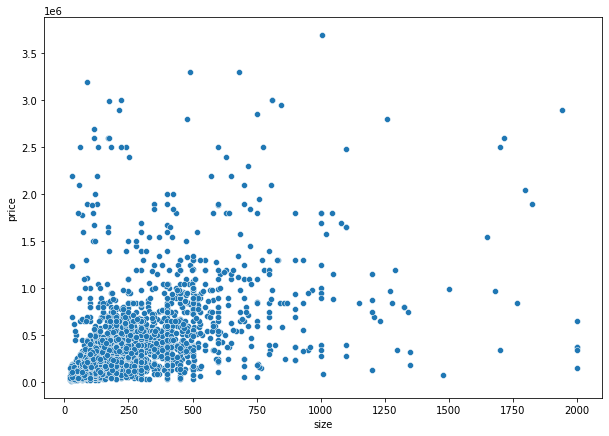

In [43]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfVendre_O , x="size", y="price")

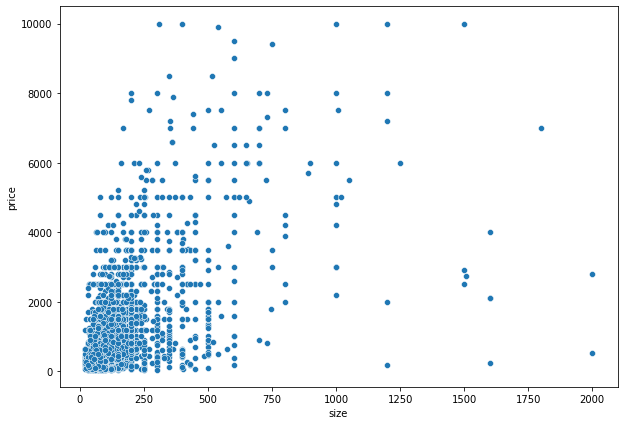

In [44]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfLouer_O , x="size", y="price")

Pandas concat function

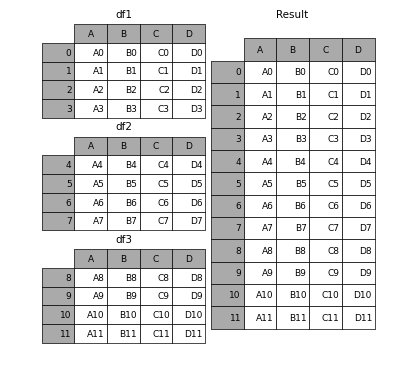

In [45]:
df_New = pd.concat([dfVendre_O,dfLouer_O])

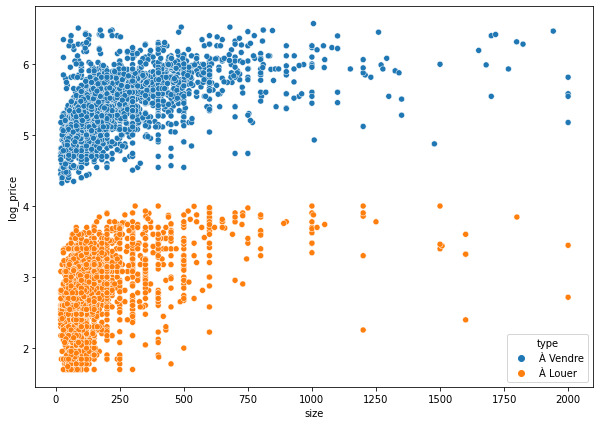

In [46]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df_New , x="size", y="log_price", hue="type")

In [47]:
X = df_New.drop(['price','log_price','region'],axis = 1)
y = df_New.log_price

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [49]:
from sklearn.preprocessing import OrdinalEncoder

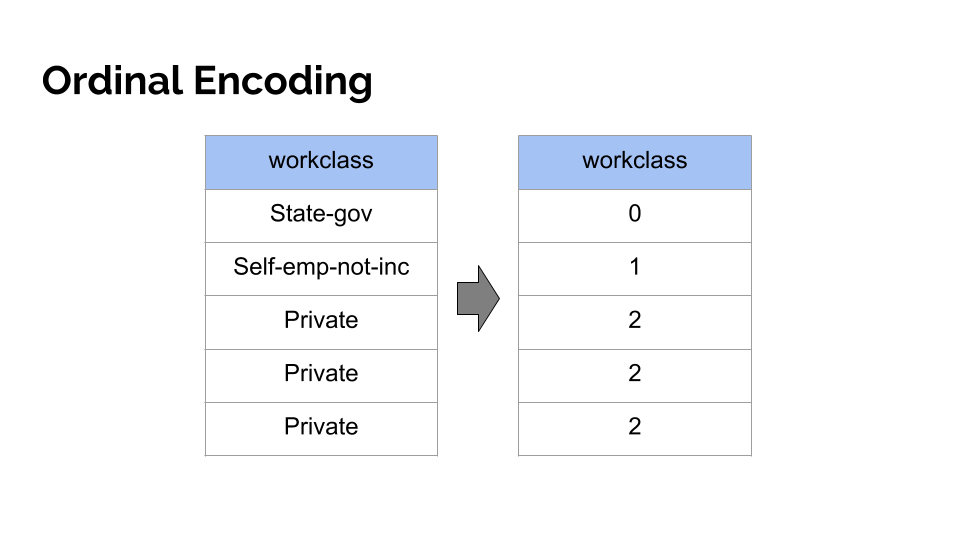

In [50]:
Cat_Col = ['category','city','type']
Num_Col = ['room_count','bathroom_count' , 'size']
oe= OrdinalEncoder()

In [51]:
oe.fit_transform(df_New[Cat_Col])

array([[ 0.,  0.,  1.],
       [ 5.,  0.,  1.],
       [ 5.,  0.,  1.],
       ...,
       [ 0., 22.,  0.],
       [ 0., 22.,  0.],
       [ 5., 22.,  0.]])

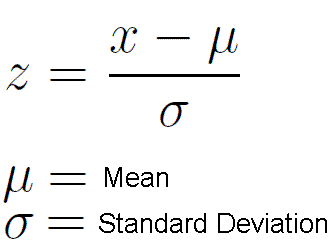

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(dfVendre[Num_Col])

array([[-0.67658725,  0.48902265, -0.48887868],
       [ 0.3862288 ,  0.48902265,  4.38201204],
       [-0.67658725, -0.64055512, -0.32429151],
       ...,
       [ 0.91763683,  1.61860042,  0.52088588],
       [-0.14517923, -0.64055512,  2.38917273],
       [-0.14517923, -0.64055512, -0.14635943]])

In [53]:
from sklearn.compose import ColumnTransformer
Pipeline = ColumnTransformer([
    ("num", StandardScaler(), Num_Col),
    ('cat', OrdinalEncoder(),Cat_Col)
])

In [54]:
x_train  = Pipeline.fit_transform(x_train)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
Grid_par = [
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4]},
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4],'max_depth' : [10,20,30]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4],'max_depth' : [10,20,30]}
            ]
model = RandomForestRegressor()

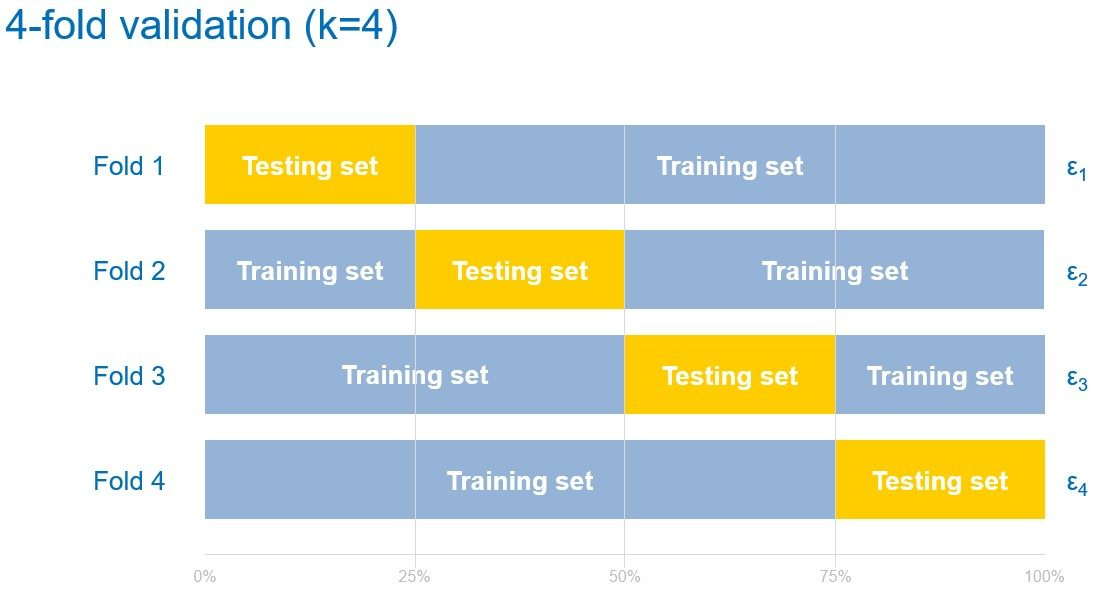

In [70]:
GridSearch = GridSearchCV(estimator= model , param_grid=Grid_par, cv = 5,
                         scoring='neg_mean_absolute_error', return_train_score=True)

In [71]:
GridSearch.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 

In [61]:
results = GridSearch.cv_results_

In [ ]:
results

In [63]:
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print (np.sqrt(-mean_score),params)

0.4720325393638449 {'max_features': 2, 'n_estimators': 5}
0.46463857109469225 {'max_features': 2, 'n_estimators': 10}
0.46082773714485487 {'max_features': 2, 'n_estimators': 20}
0.4574412800781138 {'max_features': 2, 'n_estimators': 30}
0.4564984832958666 {'max_features': 2, 'n_estimators': 50}
0.4560286507515108 {'max_features': 2, 'n_estimators': 100}
0.4722579418669132 {'max_features': 3, 'n_estimators': 5}
0.46277399682117465 {'max_features': 3, 'n_estimators': 10}
0.4586859037780938 {'max_features': 3, 'n_estimators': 20}
0.4574710764379915 {'max_features': 3, 'n_estimators': 30}
0.456095365155264 {'max_features': 3, 'n_estimators': 50}
0.4553507064141693 {'max_features': 3, 'n_estimators': 100}
0.46810276868306333 {'max_features': 4, 'n_estimators': 5}
0.4619801998155859 {'max_features': 4, 'n_estimators': 10}
0.45922999047200713 {'max_features': 4, 'n_estimators': 20}
0.45787884419228375 {'max_features': 4, 'n_estimators': 30}
0.45678699800434325 {'max_features': 4, 'n_estimator

In [72]:
GridSearch.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
FinalModel = GridSearch.best_estimator_

In [74]:
x_test  = Pipeline.transform(x_test)

In [75]:
preds = FinalModel.predict(x_test)

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [77]:
(mean_absolute_error(y_test, preds))**0.5

0.4299726721805735

array([5.89491034, 2.83080101, 5.34820333, ..., 5.04818891, 2.85783497,
       3.13810439])

11893    6.096910
196      2.079181
10638    4.977724
7679     2.929419
4418     5.599883
           ...   
5657     2.698970
9345     2.623249
4302     5.230449
1188     2.079181
2022     3.060698
Name: log_price, Length: 1530, dtype: float64

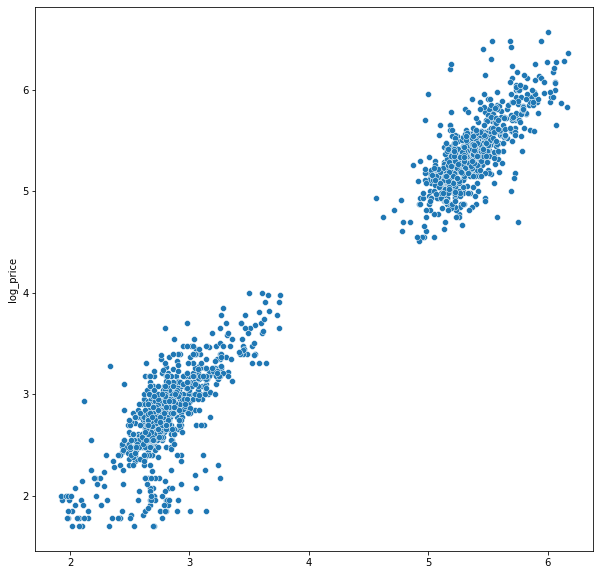

In [83]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= preds ,y = y_test )